# Waterloo Data Science Club - Data Visualization Challenge

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Read in the data bus data
bus_data_2023 = pd.read_excel('data/ttc-bus-delay-data-2023.xlsx', sheet_name='2023')
bus_data_2022 = pd.read_excel('data/ttc-bus-delay-data-2022.xlsx', sheet_name='2022')

bus_data = pd.concat([bus_data_2023, bus_data_2022])

# Read in the subway data
subway_data_2023 = pd.read_excel('data/ttc-subway-delay-data-2023.xlsx', sheet_name='2023')
subway_data_2022 = pd.read_excel('data/ttc-subway-delay-data-2022.xlsx', sheet_name='2022')

subway_data = pd.concat([subway_data_2023, subway_data_2022])

# Read in the streetcar data
streetcar_data_2023 = pd.read_excel('data/ttc-streetcar-delay-data-2023.xlsx', sheet_name='2023')
streetcar_data_2022 = pd.read_excel('data/ttc-streetcar-delay-data-2022.xlsx', sheet_name='2022')

streetcar_data = pd.concat([streetcar_data_2023, streetcar_data_2022])

In [68]:
import warnings

# Disable warnings during the datetime conversion and component extraction
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Convert the "Time" column to datetime format
    bus_data['Time'] = pd.to_datetime(bus_data['Time'])
    subway_data['Time'] = pd.to_datetime(subway_data['Time'])
    streetcar_data['Time'] = pd.to_datetime(streetcar_data['Time'])

    # Extract the hour and minute components
    bus_data['Hour'] = bus_data['Time'].dt.hour
    bus_data['Minute'] = bus_data['Time'].dt.minute
    subway_data['Hour'] = subway_data['Time'].dt.hour
    subway_data['Minute'] = subway_data['Time'].dt.minute
    streetcar_data['Hour'] = streetcar_data['Time'].dt.hour
    streetcar_data['Minute'] = streetcar_data['Time'].dt.minute

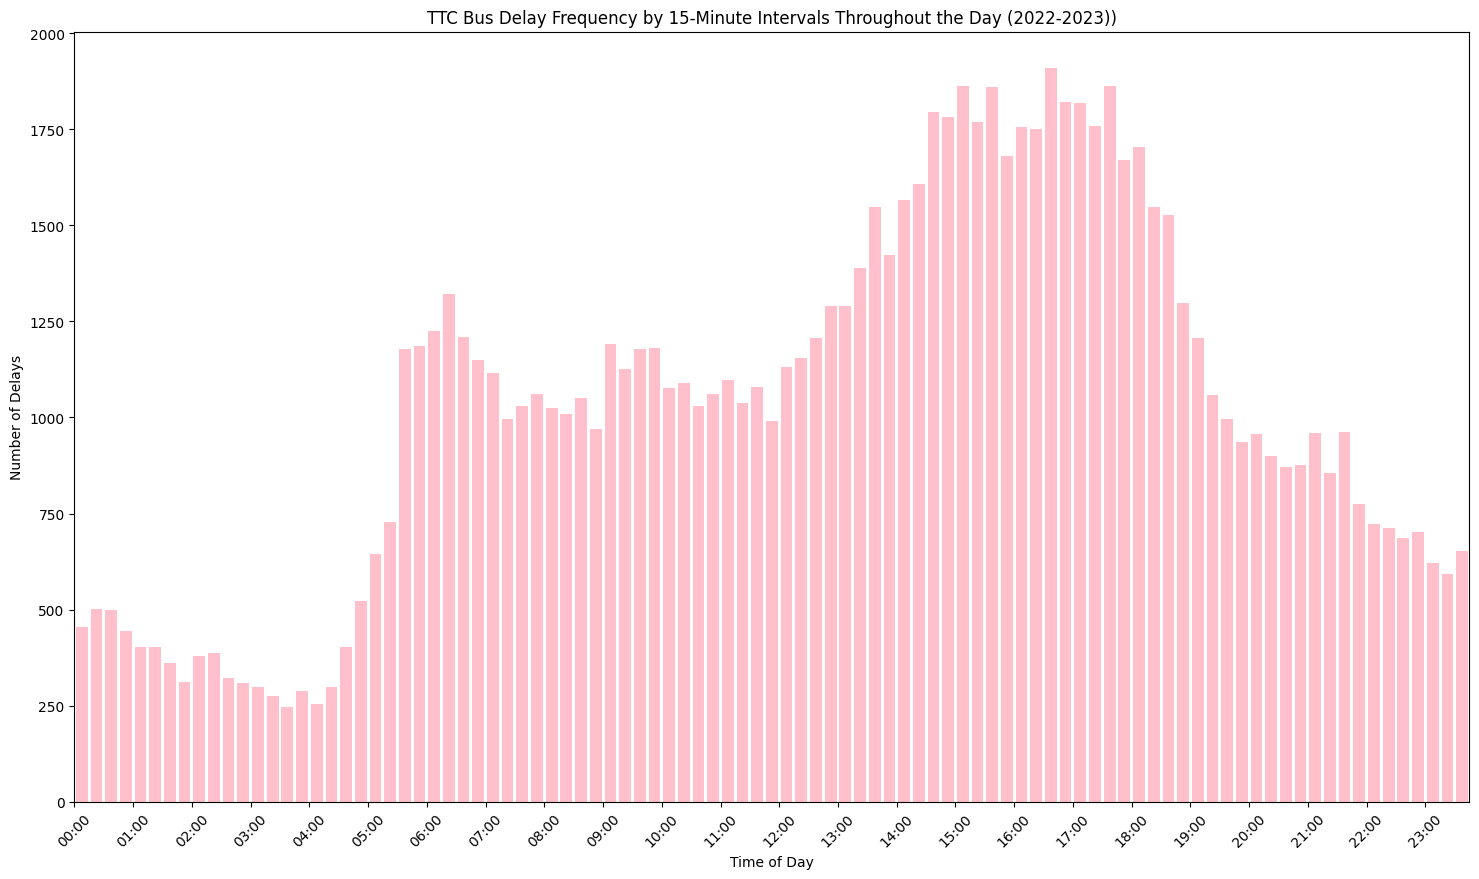

In [69]:
# Create a histogram of delays by 15-minute intervals
plt.figure(figsize=(18, 10))
hist, bins, _ = plt.hist(
    (bus_data['Hour'] * 60 + bus_data['Minute']).values, 
    bins=range(0, 24 * 60 - 1, 15),
    rwidth=0.8, 
    # edgecolor='black',
    color='pink'
)

times = [f'{h:02d}:{m:02d}' for h in range(24) for m in range(0, 60, 15)]

plt.title('TTC Bus Delay Frequency by 15-Minute Intervals Throughout the Day (2022-2023))')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delays')
plt.xticks(bins[::4], times[::4], rotation=45)


# Formatting
plt.grid(False)
plt.xlim(0, 24 * 60 - 15)

plt.show()

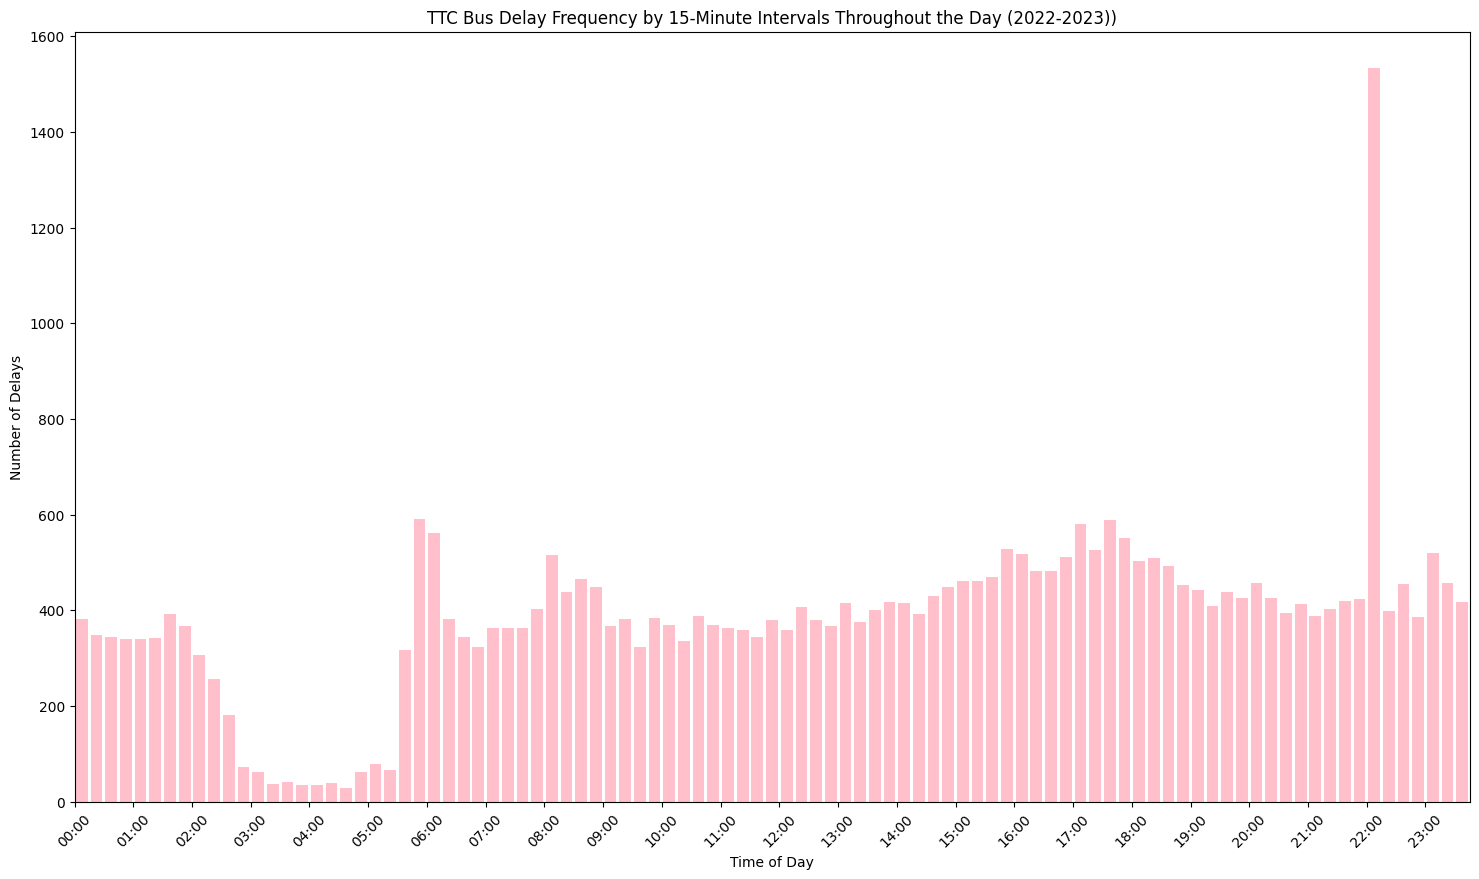

In [70]:
# Create a histogram of delays by 15-minute intervals
plt.figure(figsize=(18, 10))
hist, bins, _ = plt.hist(
    (subway_data['Hour'] * 60 + subway_data['Minute']).values, 
    bins=range(0, 24 * 60 - 1, 15),
    rwidth=0.8, 
    # edgecolor='black',
    color='pink'
)

times = [f'{h:02d}:{m:02d}' for h in range(24) for m in range(0, 60, 15)]

plt.title('TTC Bus Delay Frequency by 15-Minute Intervals Throughout the Day (2022-2023))')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delays')
plt.xticks(bins[::4], times[::4], rotation=45)


# Formatting
plt.grid(False)
plt.xlim(0, 24 * 60 - 15)

plt.show()

In [71]:
print(bus_data.columns)

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'Hour', 'Minute'],
      dtype='object')


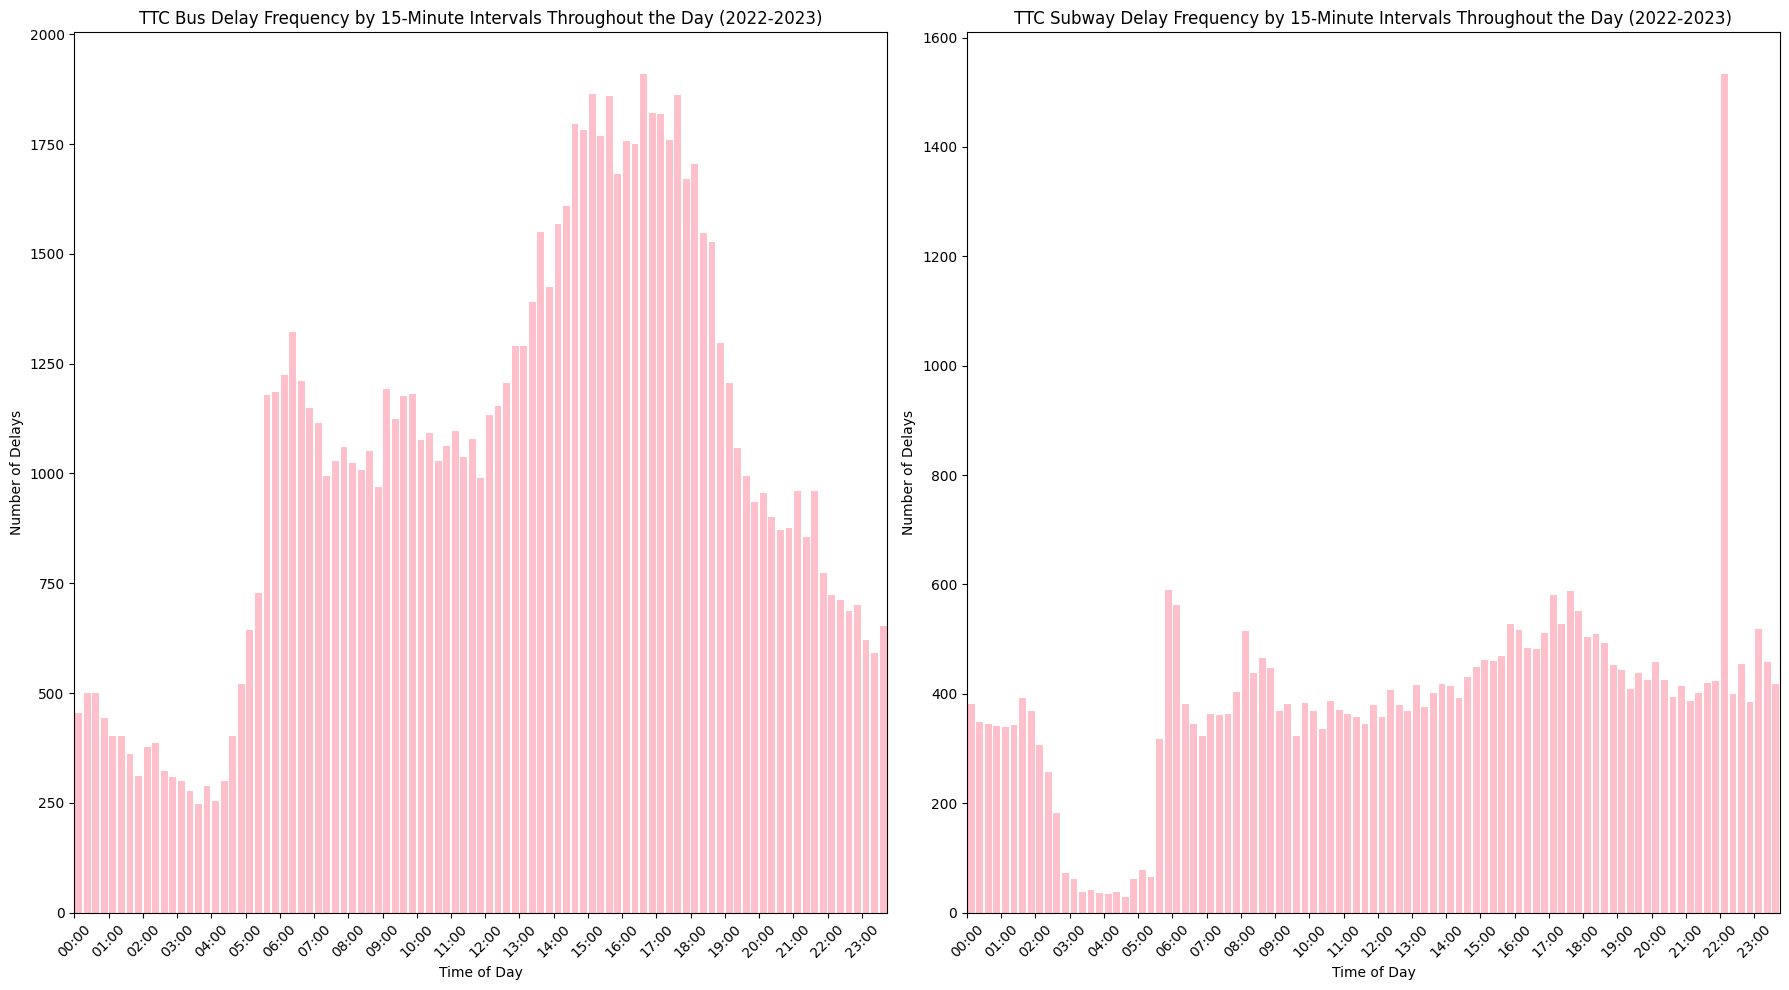

In [72]:
# Create subplots
plt.figure(figsize=(18, 10))

# Plot the first histogram on the left side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, and this is the first plot

hist, bins, _ = plt.hist(
    (bus_data['Hour'] * 60 + bus_data['Minute']).values, 
    bins=range(0, 24 * 60 - 1, 15),
    rwidth=0.8, 
    color='pink'
)
times = [f'{h:02d}:{m:02d}' for h in range(24) for m in range(0, 60, 15)]
plt.title('TTC Bus Delay Frequency by 15-Minute Intervals Throughout the Day (2022-2023)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delays')
plt.xticks(bins[::4], times[::4], rotation=45)
plt.grid(False)
plt.xlim(0, 24 * 60 - 15)

# Plot the second histogram on the right side
plt.subplot(1, 2, 2)  # 1 row, 2 columns, and this is the second plot
hist, bins, _ = plt.hist(
    (subway_data['Hour'] * 60 + subway_data['Minute']).values, 
    bins=range(0, 24 * 60 - 1, 15),
    rwidth=0.8, 
    color='pink'
)
times = [f'{h:02d}:{m:02d}' for h in range(24) for m in range(0, 60, 15)]
plt.title('TTC Subway Delay Frequency by 15-Minute Intervals Throughout the Day (2022-2023)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delays')
plt.xticks(bins[::4], times[::4], rotation=45)
plt.grid(False)
plt.xlim(0, 24 * 60 - 15)

# Adjust the layout

plt.tight_layout()

plt.show()


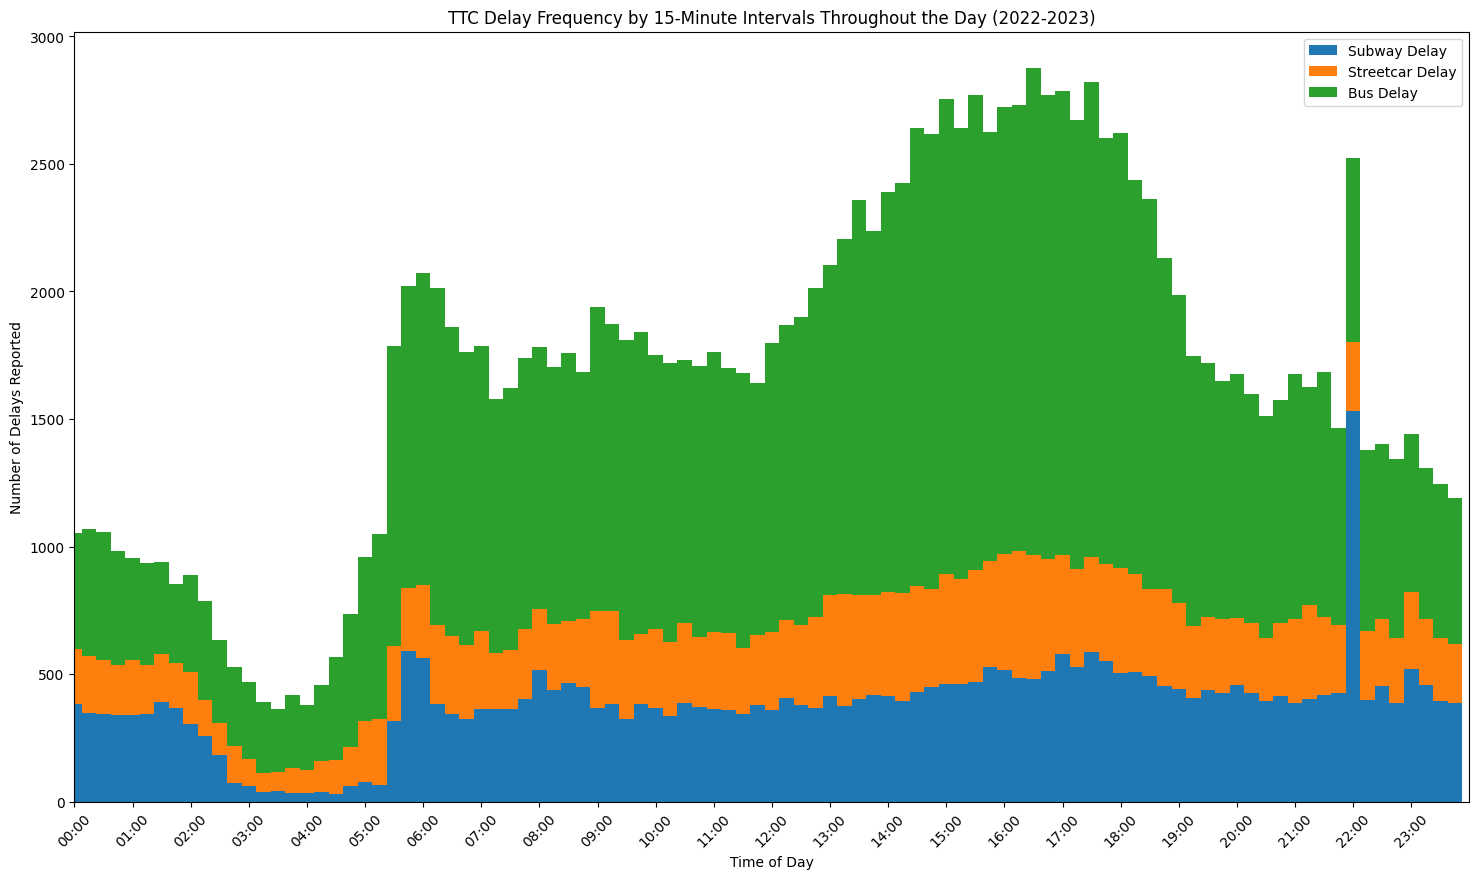

In [73]:
# Convert the "Time" column to datetime format for all dataframes
bus_data['Time'] = pd.to_datetime(bus_data['Time'])
subway_data['Time'] = pd.to_datetime(subway_data['Time'])
streetcar_data['Time'] = pd.to_datetime(streetcar_data['Time'])

# Extract the hour and minute components for all dataframes
bus_data['Hour'] = bus_data['Time'].dt.hour
bus_data['Minute'] = bus_data['Time'].dt.minute
subway_data['Hour'] = subway_data['Time'].dt.hour
subway_data['Minute'] = subway_data['Time'].dt.minute
streetcar_data['Hour'] = streetcar_data['Time'].dt.hour
streetcar_data['Minute'] = streetcar_data['Time'].dt.minute

# Calculate the number of delays for each 15-minute interval for all datasets
bus_delay_counts = bus_data.groupby((bus_data['Hour'] * 60 + bus_data['Minute']) // 15).size()
subway_delay_counts = subway_data.groupby((subway_data['Hour'] * 60 + subway_data['Minute']) // 15).size()
streetcar_delay_counts = streetcar_data.groupby((streetcar_data['Hour'] * 60 + streetcar_data['Minute']) // 15).size()

# Combine the delay counts into a single DataFrame
combined_data = pd.DataFrame({
    'Subway Delay': subway_delay_counts,
    'Streetcar Delay': streetcar_delay_counts,
    'Bus Delay': bus_delay_counts
}).fillna(0)  # Fill NaN values with 0

# Create a stacked column chart
plt.figure(figsize=(18, 10))
bottom = None

for col in combined_data.columns:
    plt.bar(
        combined_data.index * 15,  # Convert back to minutes
        combined_data[col],
        label=col,
        width=15,  # Width of each bar (15 minutes)
        bottom=bottom
    )
    if bottom is None:
        bottom = combined_data[col]
    else:
        bottom += combined_data[col]

# Set x-axis labels
times = [f'{h:02d}:{m:02d}' for h in range(0, 24, 1) for m in range(0, 60, 15)]
plt.xticks(range(0, 24 * 60, 15)[::4], times[::4], rotation=45)

# Add a legend
plt.legend()

# Set title and labels
plt.title('TTC Delay Frequency by 15-Minute Intervals Throughout the Day (2022-2023)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delays Reported')

# Remove gridlines
plt.grid(False)

# Set the x-axis limit to match the full 24-hour day
plt.xlim(0, 24 * 60)

plt.show()


In [74]:
subway_delay_codes = pd.read_excel('data/ttc-subway-delay-codes.xlsx', sheet_name='Sheet 1', header=1)
subway_code_map = subway_delay_codes[["SUB RMENU CODE", "CODE DESCRIPTION"]]
subway_data['Code'] = subway_data['Code'].map(subway_code_map.set_index('SUB RMENU CODE')['CODE DESCRIPTION'])
subway_code_map.head()

,SUB RMENU CODE,CODE DESCRIPTION
0,EUAC,Air Conditioning
1,EUAL,Alternating Current
2,EUATC,ATC RC&S Equipment
3,EUBK,Brakes
4,EUBO,Body


Code
Misc. Engineering & Construction Related Problems    171.000000
Force Majeure                                        148.000000
Priority One - Train in Contact With Person           80.512195
Traction Power Rail Related                           49.000000
Bomb Threat                                           36.680000
Signals Zone Countroller Failure                      29.333333
Traction Power or Related Components Failure          29.000000
Fire/Smoke Plan B - Source TTC                        28.778626
Fire/Smoke Plan A                                     26.166667
Suspicious Package                                    24.428571
Name: Min Delay, dtype: float64


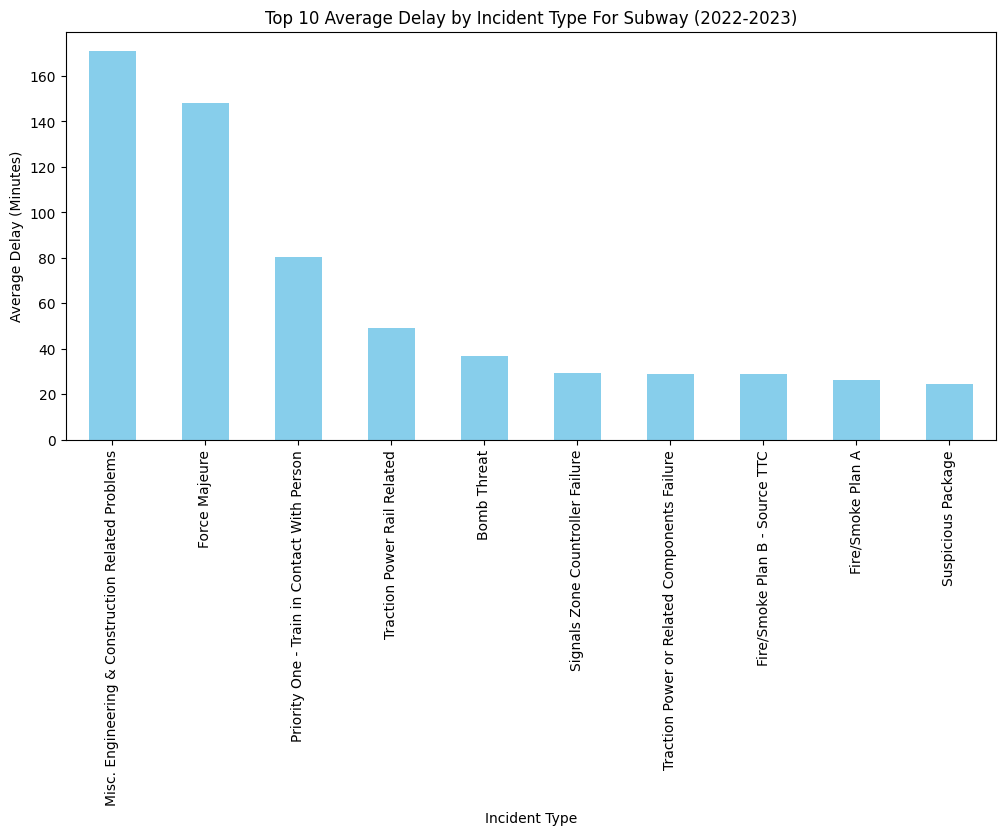

In [75]:
# Calculate the average Min Delay for each incident type
average_delay_by_incident = subway_data.groupby('Code')['Min Delay'].mean()

# Sort the data for a better visualization
average_delay_by_incident = average_delay_by_incident.sort_values(ascending=False)

# Take the top 10 incident types
top_10_average_delay = average_delay_by_incident.head(10)
print(top_10_average_delay)
# Create a bar plot of the top 10 average Min Delay by incident type
plt.figure(figsize=(12, 6))
top_10_average_delay.plot(kind='bar', color='skyblue')
plt.title('Top 10 Average Delay by Incident Type For Subway (2022-2023)')
plt.xlabel('Incident Type')
plt.ylabel('Average Delay (Minutes)')

plt.xticks(rotation=90)

# Add a little extra space at the bottom to fit the labels
plt.subplots_adjust(bottom=0.2)
plt.grid(False)
plt.show()


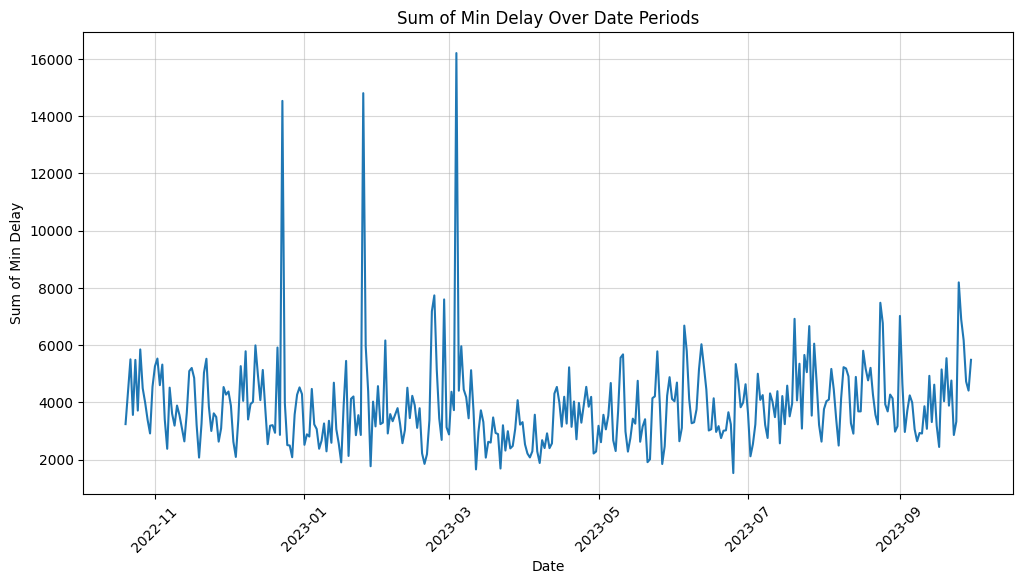

In [76]:
all_data = pd.concat([bus_data, subway_data, streetcar_data])

one_year_ago = pd.to_datetime('today') - pd.DateOffset(years=1)

# Filter the data for dates in the last year
data_last_year = all_data[all_data['Date'] >= one_year_ago]


# Group the data by date and calculate the sum of Min Delay for each date
daily_sum = data_last_year.groupby('Date')['Min Delay'].sum()


# Create a line plot of the sum of Min Delay over date periods
plt.figure(figsize=(12, 6))
plt.plot(daily_sum.index, daily_sum.values, linestyle='-')
plt.title('Sum of Min Delay Over Date Periods')
plt.xlabel('Date')
plt.ylabel('Sum of Min Delay')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()



2556433
4.863837519025875


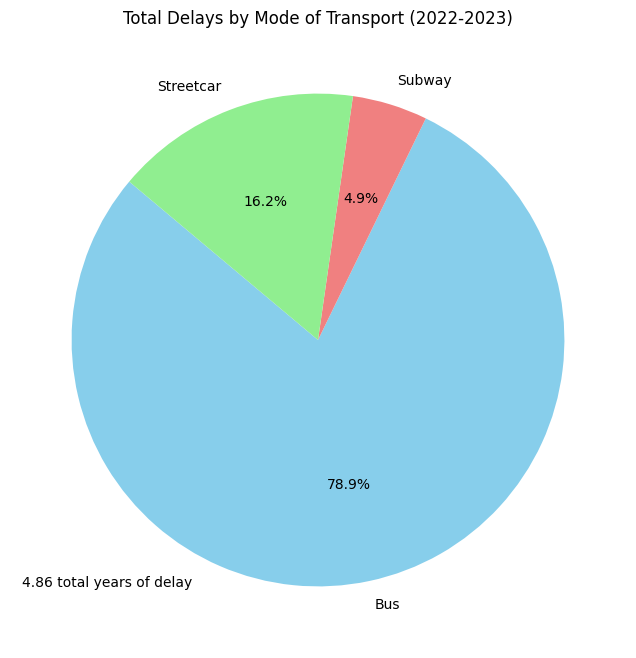

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in Pandas DataFrames called bus_data, subway_data, and streetcar_data
# If not, load your data into DataFrames first.

# Calculate the total Min Delay for each mode of transport
bus_total_delay = bus_data['Min Delay'].sum()
subway_total_delay = subway_data['Min Delay'].sum()
streetcar_total_delay = streetcar_data['Min Delay'].sum()
print(bus_total_delay + subway_total_delay + streetcar_total_delay)
total_delay_in_hours = (((bus_total_delay + subway_total_delay + streetcar_total_delay) / 60)/24)/365
print(total_delay_in_hours)

# Create a list of total delays and labels for the pie chart
total_delays = [bus_total_delay, subway_total_delay, streetcar_total_delay]
labels = ['Bus', 'Subway', 'Streetcar']
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_delays, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Delays by Mode of Transport (2022-2023)')

plt.text(-1.2, -1, f'{total_delay_in_hours:.2f} total years of delay', ha='left')

plt.show()
